In [3]:
# importing libraries

# to iterate through directories
import os

# to do some image operations
import cv2

# to plot images 
import matplotlib.pyplot as plt


import math
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(3)

Lets first define the working directory and the classes that we are interested in classifying

In [8]:
# Define our working directory
DATA_DIR = "./Dataset"
print(DATA_DIR)

# Define our classes
CLASSES = ["Mohammed", "notMohammed"]

./Dataset


In [15]:
# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

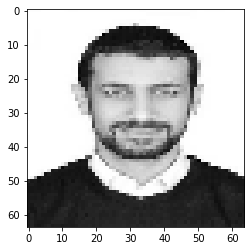

(64, 64)


In [26]:
for label in CLASSES:
    # path to Mohammed or notMohammed
    path = os.path.join(DATA_DIR, label)
    
    for img in os.listdir(path):
        img_array = cv2.resize(cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
, (64,64))
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        print(img_array.shape)
        break
    break
    

In [25]:
print(img_array.shape[0])

27648


In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes